In [1]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
def load_and_resize_images(folder_path, target_size):

    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    dataset = ImageFolder(folder_path, transform=transform)
    images = []
    labels = []

    for image, label in dataset:
        images.append(image.numpy().flatten())
        labels.append(dataset.classes[label])
    return images, labels

training_folder = 'data/Training'
testing_folder = 'data/Testing'

target_size = (128, 128)

train_images, train_labels = load_and_resize_images(training_folder, target_size)

test_images, test_labels = load_and_resize_images(testing_folder, target_size)

train_df = pd.DataFrame(train_images)
train_df['class'] = train_labels

test_df = pd.DataFrame(test_images)
test_df['class'] = test_labels

In [3]:
pca3 = PCA(n_components=3, svd_solver='full')
transformed_features3_train = pca3.fit_transform(train_df[train_df.columns[:-1]])
transformed_features3_test = pca3.fit_transform(test_df[test_df.columns[:-1]])

pca10 = PCA(n_components=10, svd_solver='full')
transformed_features10_train = pca10.fit_transform(train_df[train_df.columns[:-1]])
transformed_features10_test = pca10.fit_transform(test_df[test_df.columns[:-1]])

In [4]:
features3_train = pd.DataFrame(transformed_features3_train, columns=['feature_1', 'feature_2', 'feature_3'])
features3_test = pd.DataFrame(transformed_features3_test, columns=['feature_1', 'feature_2', 'feature_3'])
features3_train['class'] = train_df['class']
features3_test['class'] = test_df['class']
features3_train.to_csv('features/3_features_train.csv', index=False)
features3_test.to_csv('features/3_features_test.csv', index=False)

features10_train = pd.DataFrame(transformed_features10_train, columns=['feature_' + str(i+1) for i in range(10)])
features10_test = pd.DataFrame(transformed_features10_test, columns=['feature_' + str(i+1) for i in range(10)])
features10_train['class'] = train_df['class']
features10_test['class'] = test_df['class']
features10_train.to_csv('features/10_features_train.csv', index=False)
features10_test.to_csv('features/10_features_test.csv', index=False)

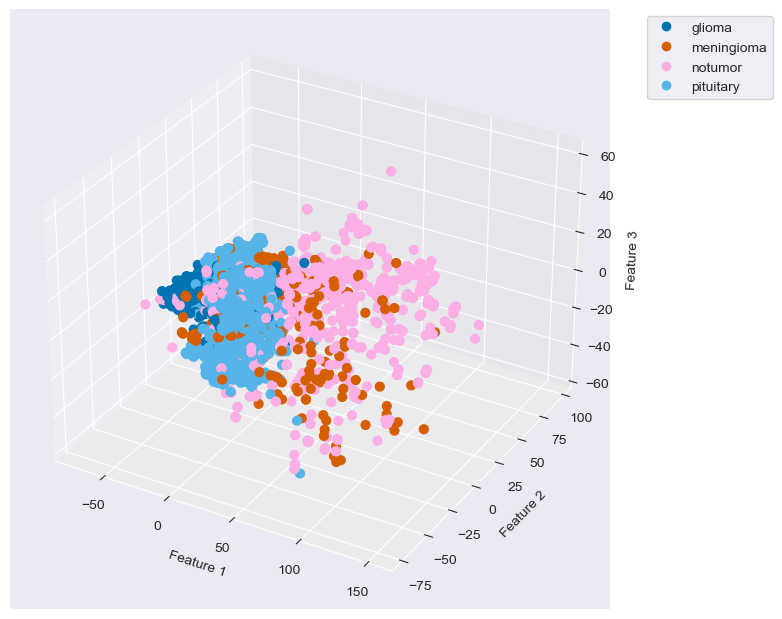

In [11]:
class_map = {'glioma': 0,
             'meningioma': 1,
             'notumor': 2,
             'pituitary': 3}
class_labels = features3_train['class'].unique()
class_to_color = {class_label: sns.color_palette("husl", len(class_labels))[i] for i, class_label in enumerate(class_labels)}
cmap = ListedColormap(sns.color_palette("colorblind").as_hex())

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(features3_train['feature_1'], features3_train['feature_2'], features3_train['feature_3'],
                s=40, c=features3_train['class'].apply(lambda c: class_map[c]), marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

legend_labels = [class_label for class_label in class_labels]
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')